In [13]:
from funciones_LSTM import *

In [2]:
df = pd.read_parquet('data_export/prueba_ml.parquet')
df.reset_index(inplace=True, drop=True)
df['dia_semana'] = df['fecha'].dt.weekday + 1
year = 2023
us_holidays = holidays.US(years=year)
us_holidays
df['holiday'] = np.where(df['fecha'].isin(us_holidays), 1, 0)
df['rain'] = df['rain'].shift(1)
df['snowfall'] = df['snowfall'].shift(1)
df.fillna(0.0, inplace=True)
df.head()

,fecha,hora,temperature_2m,rain,relative_humidity_2m,snowfall,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia,dia_semana,holiday
0,2023-11-01,0.0,8.6725,0.0,60.153034,0.0,3,12,2196,232,1,2023,11,1,3,0
1,2023-11-01,1.0,8.5725,0.1,60.344471,0.0,2,12,1521,55,0,2023,11,1,3,0
2,2023-11-01,2.0,8.3225,0.0,62.933163,0.0,3,8,1214,16,0,2023,11,1,3,0
3,2023-11-01,3.0,8.0725,0.1,66.100021,0.0,0,13,854,20,0,2023,11,1,3,0
4,2023-11-01,4.0,7.7725,0.0,72.938622,0.0,12,20,654,25,0,2023,11,1,3,0


In [3]:
columnas_X = ['año', 'mes', 'dia', 'hora', 'dia_semana', 'holiday', 'temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall']
X = df[columnas_X]

columnas_Y= ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Y = df[columnas_Y]

In [4]:
df_eval = evaluar_modelos(X, Y, nro_pasos=10, nro_capas_lstm=[2], unidades_capa= [50,40], loss_= ['mse'], 
                          act_salida=['linear', 'relu'], act_lstm= ['relu', 'sigmoid'], nro_capas_dense=2, unidades_dense=[30,20], 
                          act_dense= ['linear', 'sigmoid'], drop_out=0, scaler='minmax'
                          )



10/10 [==============================] - 0s 0s/step - loss: 0.0222
Finalizada combinación 1 de 320. Score= 0.018
Mejor combinación: 1. Score: 0.018
Quedan 140.92 minutos.
10/10 [==============================] - 0s 0s/step - loss: 0.0177
Finalizada combinación 2 de 320. Score= 0.018
Mejor combinación: 2. Score: 0.018
Quedan 136.92 minutos.
10/10 [==============================] - 0s 2ms/step - loss: 0.0243
Finalizada combinación 3 de 320. Score= 0.017
Mejor combinación: 3. Score: 0.017
Quedan 135.83 minutos.
10/10 [==============================] - 0s 2ms/step - loss: 0.0179
Finalizada combinación 4 de 320. Score= 0.019
Mejor combinación: 3. Score: 0.017
Quedan 134.22 minutos.
10/10 [==============================] - 0s 1ms/step - loss: 0.0218
Finalizada combinación 5 de 320. Score= 0.015
Mejor combinación: 5. Score: 0.015
Quedan 135.08 minutos.
10/10 [==============================] - 0s 2ms/step - loss: 0.0145
Finalizada combinación 6 de 320. Score= 0.015
Mejor combinación: 5. Scor

In [4]:
df_eval = pd.read_csv('evaluacion.csv')

In [5]:
df_eval

,combinacion,nro_pasos,nro_capas_lstm,unidades_capa,nro_capas_dense,unidades_dense,loss_function,act_salida,act_lstm,act_dense,loss_value(mse),cv_scores_mean,tiempo(s)
0,1,1,2,"50, 40",2,"30, 20",mse,linear,relu,linear,0.022172,0.018381,26.504583
1,2,1,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.017718,0.018379,25.162451
2,3,1,2,"50, 40",2,"30, 20",mse,linear,relu,linear,0.024323,0.017091,25.457795
3,4,1,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.017932,0.018928,24.814749
4,5,1,2,"50, 40",2,"30, 20",mse,linear,relu,linear,0.021756,0.014923,26.708391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,4,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.014310,0.017826,43.743695
150,151,4,2,"50, 40",2,"30, 20",mse,linear,sigmoid,linear,0.017609,0.021596,43.241595
151,152,4,2,"50, 40",2,"30, 20",mse,linear,sigmoid,sigmoid,0.018199,0.021985,41.409499
152,153,4,2,"50, 40",2,"30, 20",mse,linear,sigmoid,linear,0.020638,0.021255,42.461852


In [6]:
df_eval['nro_capas_dense'].unique()

array([2], dtype=int64)

In [6]:
df_eval.sort_values('cv_scores_mean')

,combinacion,nro_pasos,nro_capas_lstm,unidades_capa,nro_capas_dense,unidades_dense,loss_function,act_salida,act_lstm,act_dense,loss_value(mse),cv_scores_mean,tiempo(s)
51,52,2,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.017578,0.013839,32.263136
53,54,2,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.013747,0.014482,32.668853
61,62,2,2,"50, 40",2,"30, 20",mse,relu,relu,sigmoid,0.051491,0.014769,29.673205
99,100,3,2,"50, 40",2,"30, 20",mse,linear,relu,sigmoid,0.017433,0.014917,46.236188
4,5,1,2,"50, 40",2,"30, 20",mse,linear,relu,linear,0.021756,0.014923,26.708391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,45,1,2,"50, 40",2,"30, 20",mae,relu,sigmoid,linear,0.026253,0.078905,26.959638
19,20,1,2,"50, 40",2,"30, 20",mse,relu,sigmoid,sigmoid,0.025961,0.080542,24.596919
92,93,2,2,"50, 40",2,"30, 20",mae,relu,sigmoid,linear,0.023383,0.081004,35.221952
114,115,3,2,"50, 40",2,"30, 20",mse,relu,sigmoid,linear,0.034199,0.086775,35.604978


Pdemos ver que los mejores valores se obtienen con loss 'mse', act_lstm relu, act_dense sigmoid. 

In [7]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, 2, 2, [50, 40], 'mse', 'linear', 
                                                                                                          'relu', nro_capas_dense=2, 
                                                                                                          unidades_dense=[30, 20], act_dense= 'sigmoid')



10/10 [==============================] - 0s 2ms/step - loss: 0.0154


Valor final de Loss: 0.015391839668154716


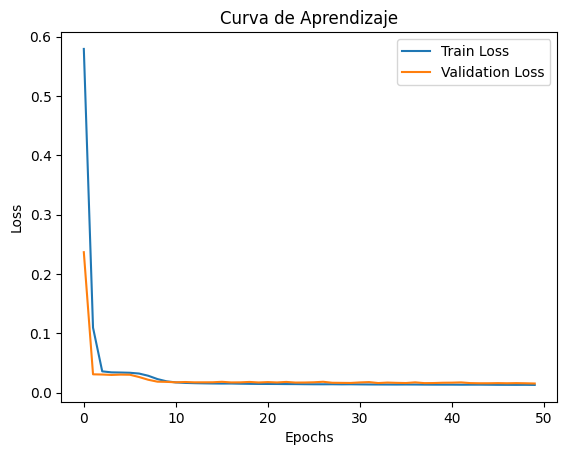

In [8]:
graficar_curva_aprendizaje(history)

10/10 [==============================] - 0s 2ms/step


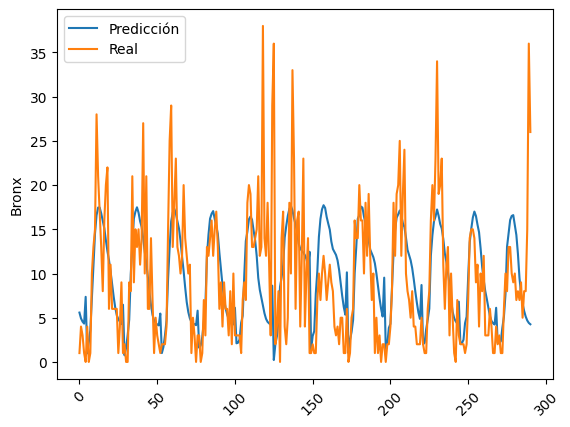

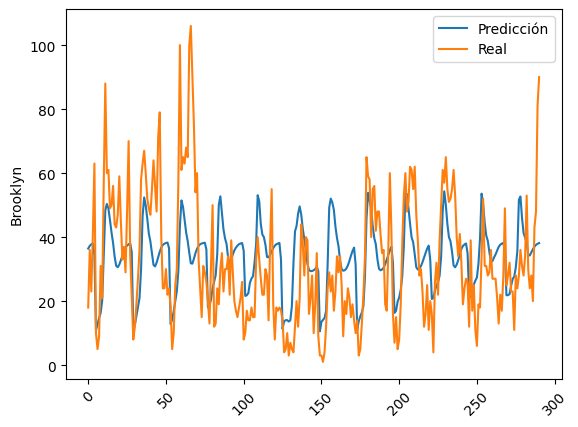

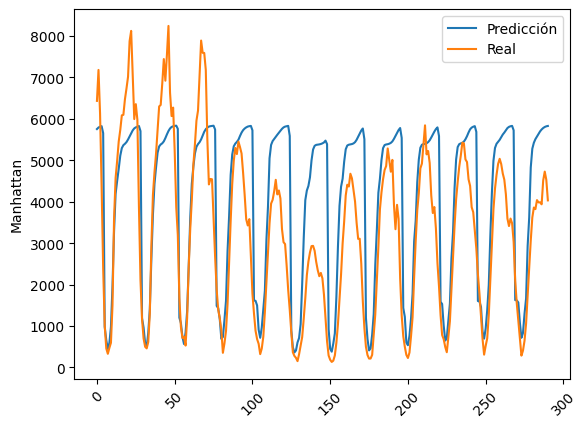

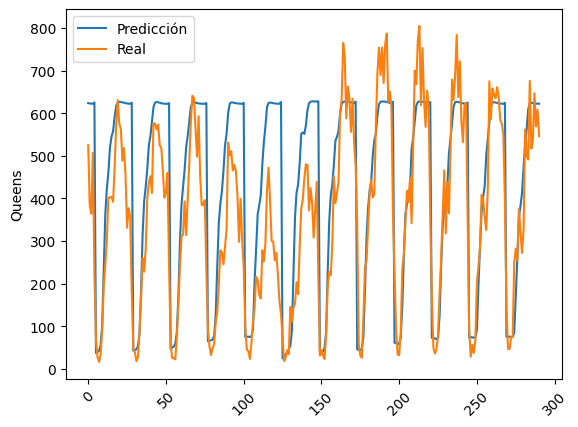

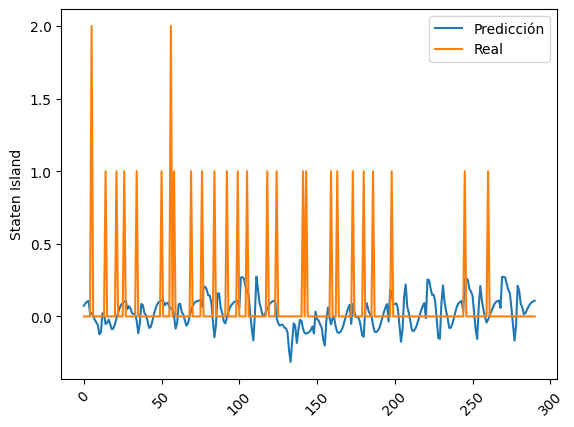

In [9]:
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Comparemos modelos sin capas Dense, con una capa Dense y con dos capas Dense:

In [4]:
df_eval_dense = evaluar_modelos(
    X, Y, nro_pasos=10, nro_capas_lstm=[2], unidades_capa=[50,40], loss_=['mse'], act_salida=['relu'], act_lstm=['relu'], act_dense=['sigmoid'],
    nro_capas_dense=2, unidades_dense=[40,30], csv_file='evaluacion_dense.csv'
)



10/10 [==============================] - 0s 2ms/step - loss: 0.0258
Finalizada combinación 1 de 30. Score= 0.024
Mejor combinación: 1. Score: 0.024
Quedan 16.56 minutos.
10/10 [==============================] - 0s 7ms/step - loss: 0.0450
Finalizada combinación 2 de 30. Score= 0.043
Mejor combinación: 1. Score: 0.024
Quedan 25.8 minutos.
10/10 [==============================] - 0s 7ms/step - loss: 0.0152
Finalizada combinación 3 de 30. Score= 0.048
Mejor combinación: 1. Score: 0.024
Quedan 28.78 minutos.
10/10 [==============================] - 0s 3ms/step - loss: 0.0211
Finalizada combinación 4 de 30. Score= 0.026
Mejor combinación: 1. Score: 0.024
Quedan 26.59 minutos.
10/10 [==============================] - 0s 3ms/step - loss: 0.0806
Finalizada combinación 5 de 30. Score= 0.063
Mejor combinación: 1. Score: 0.024
Quedan 24.24 minutos.
10/10 [==============================] - 0s 4ms/step - loss: 0.0313
Finalizada combinación 6 de 30. Score= 0.073
Mejor combinación: 1. Score: 0.024
Q

In [5]:
df_eval_dense

,combinacion,nro_pasos,nro_capas_lstm,unidades_capa,nro_capas_dense,unidades_dense,loss_function,act_salida,act_lstm,act_dense,loss_value(mse),cv_scores_mean,tiempo(s)
0,1,1,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.025769,0.023614,34.260438
1,2,1,2,"50, 40",1,"40, 30",mse,relu,relu,sigmoid,0.045023,0.043489,76.314196
2,3,1,2,"50, 40",2,"40, 30",mse,relu,relu,sigmoid,0.015206,0.048182,81.262881
3,4,2,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.021109,0.026407,53.574904
4,5,2,2,"50, 40",1,"40, 30",mse,relu,relu,sigmoid,0.080576,0.062579,45.488841
5,6,2,2,"50, 40",2,"40, 30",mse,relu,relu,sigmoid,0.031341,0.072675,82.136420
6,7,3,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.023366,0.017411,59.644496
7,8,3,2,"50, 40",1,"40, 30",mse,relu,relu,sigmoid,0.021182,0.059096,91.219492
8,9,3,2,"50, 40",2,"40, 30",mse,relu,relu,sigmoid,0.020554,0.055959,108.565893
9,10,4,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.018892,0.020569,106.042841


In [6]:
df_eval_dense.sort_values('cv_scores_mean')

,combinacion,nro_pasos,nro_capas_lstm,unidades_capa,nro_capas_dense,unidades_dense,loss_function,act_salida,act_lstm,act_dense,loss_value(mse),cv_scores_mean,tiempo(s)
12,13,5,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.019973,0.016428,141.893630
6,7,3,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.023366,0.017411,59.644496
15,16,6,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.027302,0.019336,154.905213
9,10,4,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.018892,0.020569,106.042841
24,25,9,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.021859,0.020768,140.097351
21,22,8,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.019738,0.021290,124.652461
0,1,1,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.025769,0.023614,34.260438
27,28,10,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.027489,0.026197,158.337289
3,4,2,2,"50, 40",0,"40, 30",mse,relu,relu,sigmoid,0.021109,0.026407,53.574904
23,24,8,2,"50, 40",2,"40, 30",mse,relu,relu,sigmoid,0.049698,0.027214,133.174900


Como podemos ver, las capas dense no mejoran la predicción.

In [4]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid'  )



9/9 [==============================] - 0s 10ms/step - loss: 0.0193


Valor final de Loss: 0.019251223653554916


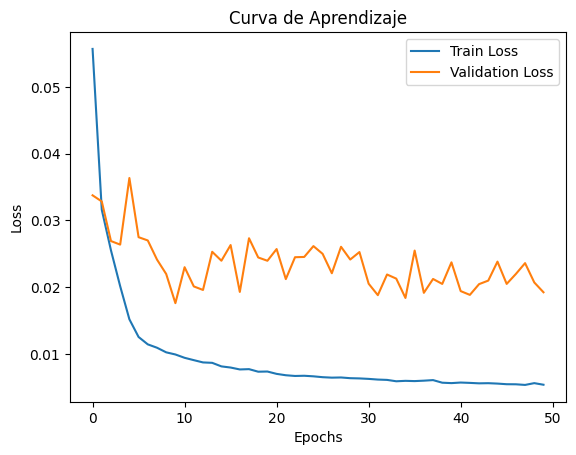

In [5]:
graficar_curva_aprendizaje(history)

9/9 [==============================] - 1s 12ms/step


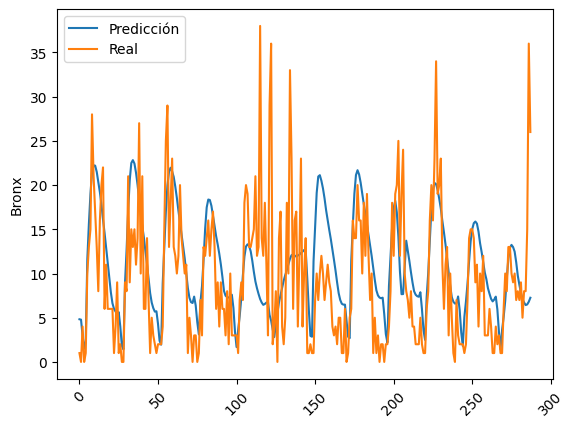

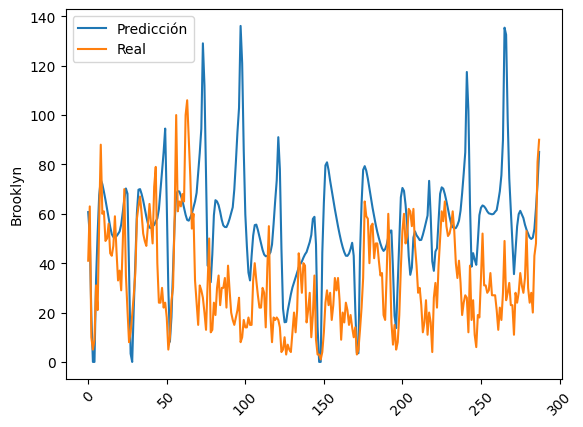

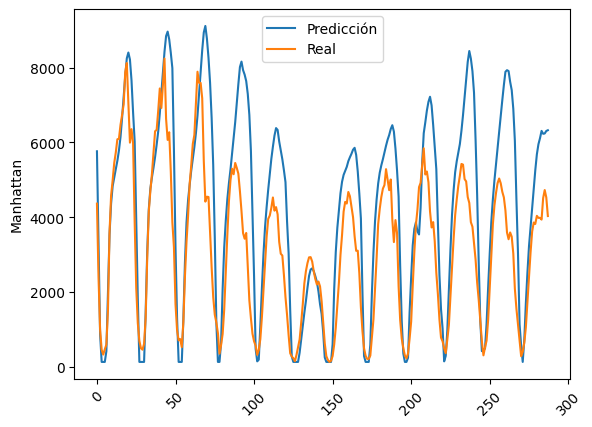

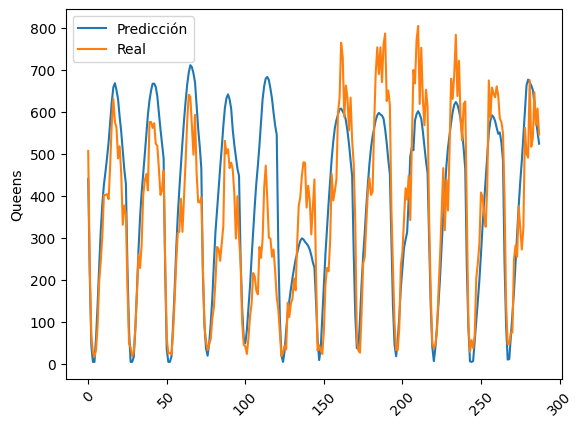

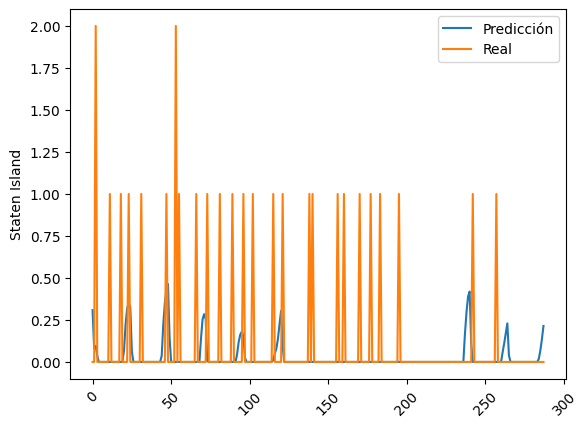

In [6]:
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Veamos si podemos mejorar el aprendizaje cambiando el learning rate:

9/9 [==============================] - 0s 8ms/step - loss: 0.0389
Valor final de Loss: 0.03892636299133301


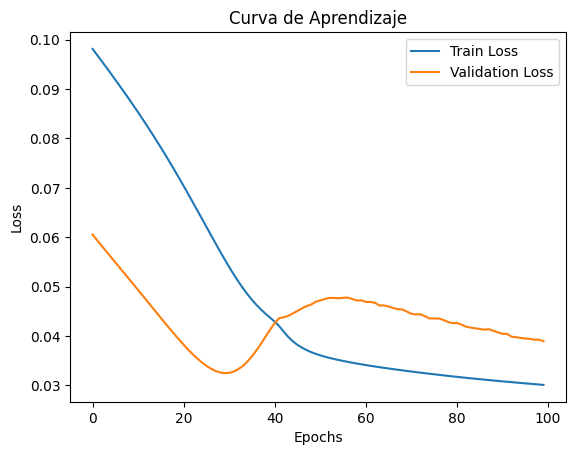

In [9]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid', learning_r=0.00001, 
                     epochs=100 )
graficar_curva_aprendizaje(history)

9/9 [==============================] - 0s 5ms/step


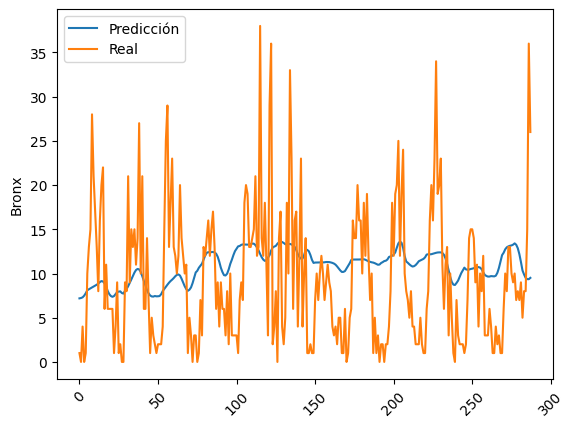

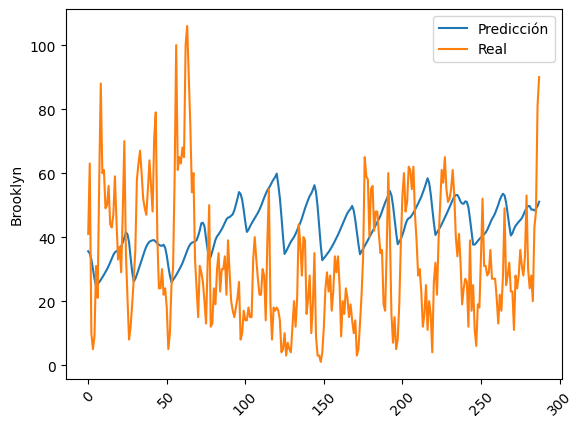

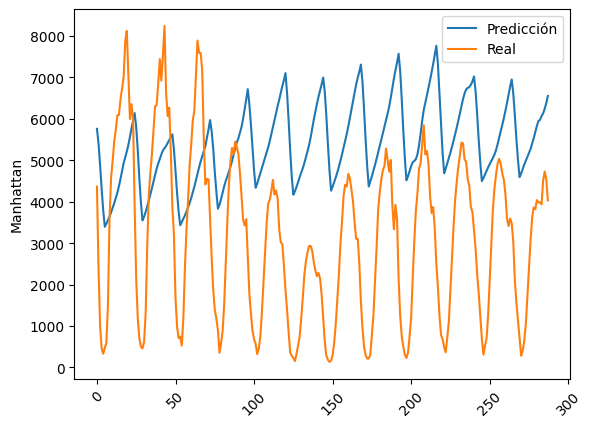

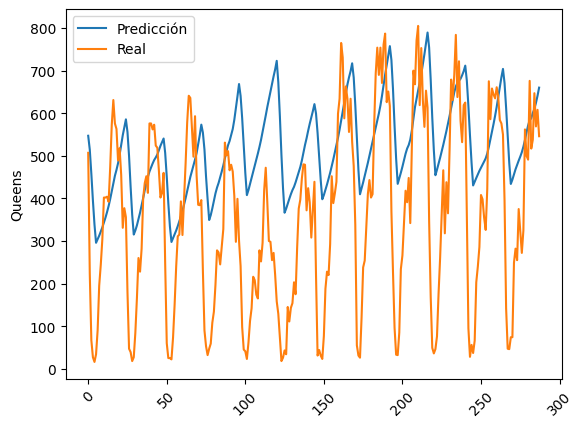

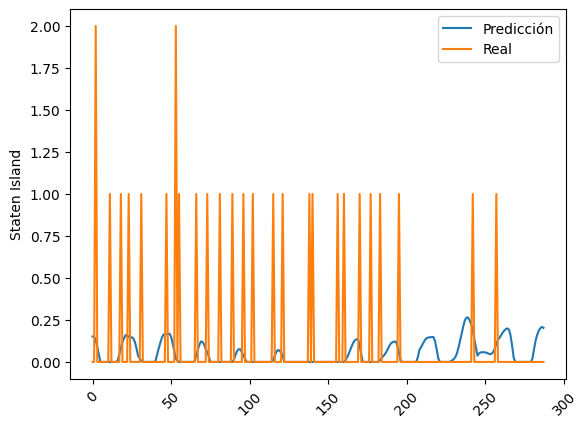

In [10]:
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

Aumentemos la cantidad de epochs

9/9 [==============================] - 0s 2ms/step - loss: 0.0177
Valor final de Loss: 0.017722975462675095


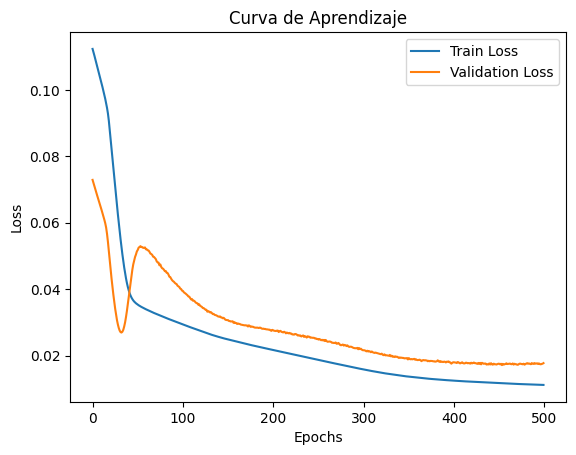

In [11]:
modelo, scaler_X, scaler_Y, X_test_reshaped, Y_test_reshaped, scores, history, loss = construir_modelo_cv(X, Y, nro_pasos=5, 
                    nro_capas_lstm=2, unidades_capa=[50,40], loss_='mse', act_salida='relu', act_lstm='relu', act_dense='sigmoid', learning_r=0.00001, 
                     epochs=500 )
graficar_curva_aprendizaje(history)

9/9 [==============================] - 0s 2ms/step


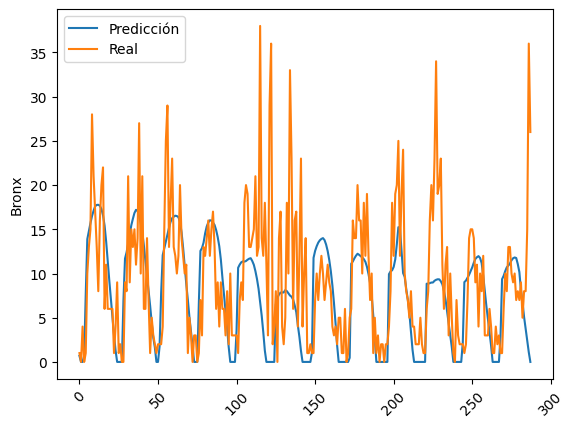

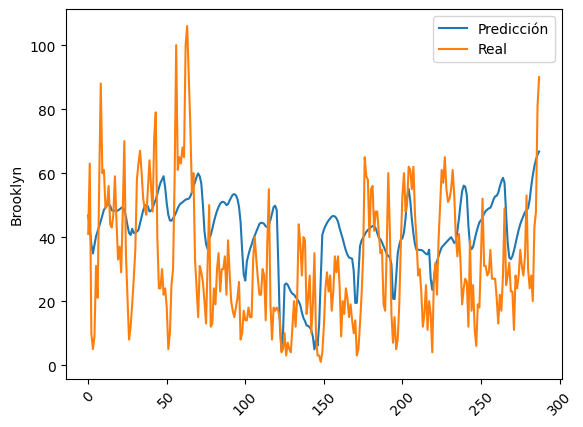

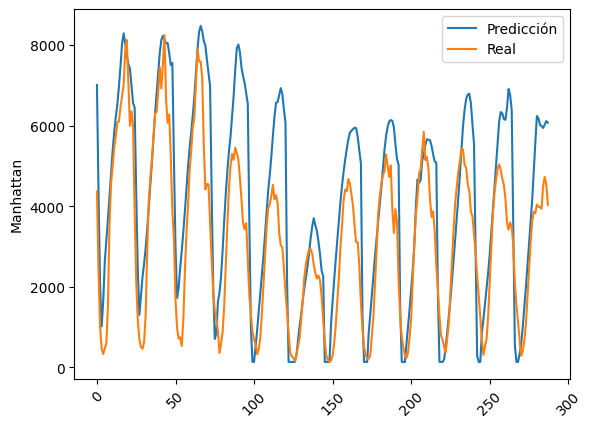

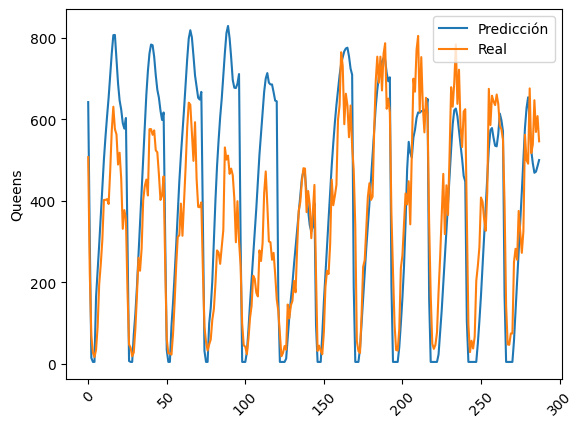

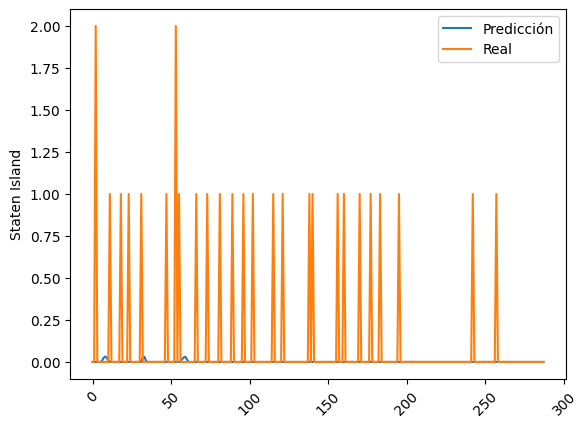

In [12]:
graficar_pred_test(X_test_reshaped, Y_test_reshaped, modelo, scaler_Y)

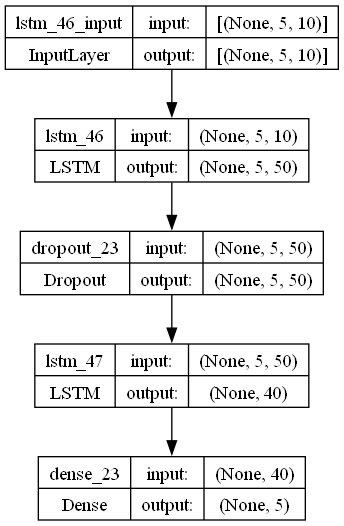

In [14]:
plot_model(modelo, to_file='final_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB')